In [15]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\preet\Documents\AdvertisingData\Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

([<matplotlib.axis.XTick at 0x2ae1ece2fd0>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400')])

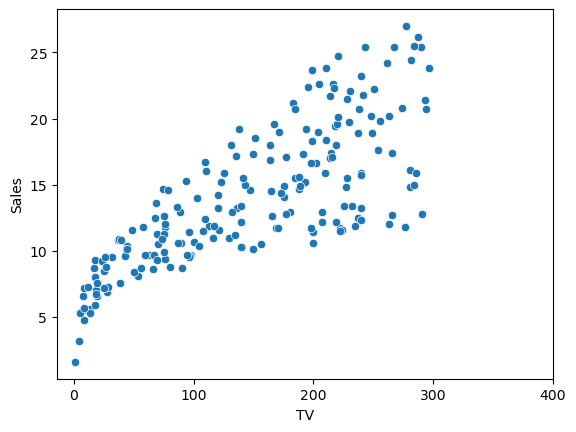

In [6]:
sns.scatterplot(data=df, x="TV", y="Sales")
plt.xticks([0,100,200,300,400])

([<matplotlib.axis.XTick at 0x2ae1f49c490>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400')])

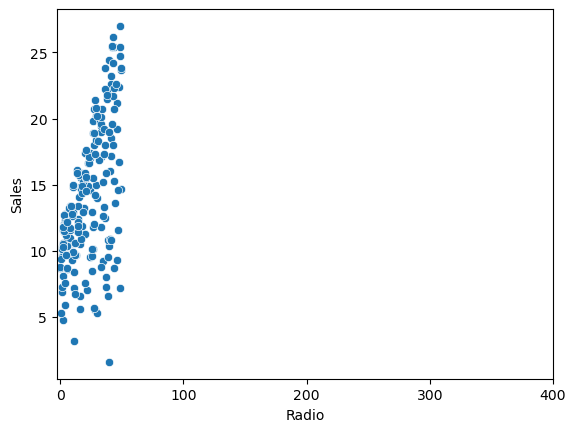

In [7]:
sns.scatterplot(data=df, x="Radio", y="Sales")
plt.xticks([0,100,200,300,400])

([<matplotlib.axis.XTick at 0x2ae1f4fa2d0>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400')])

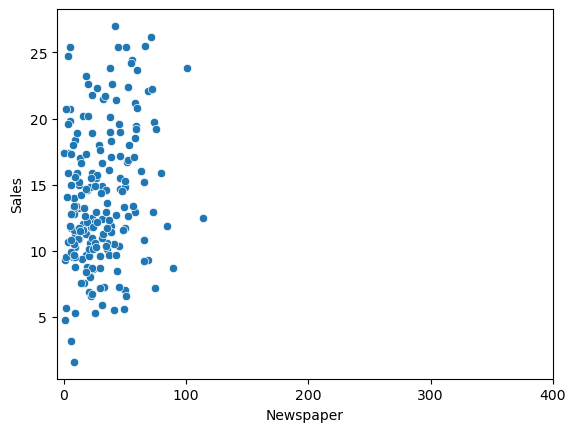

In [8]:
sns.scatterplot(data=df, x="Newspaper", y="Sales")
plt.xticks([0,100,200,300,400])

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(df[['TV','Radio','Newspaper']], df.Sales)

LinearRegression()

In [17]:
reg.predict([[300,0,0]])

array([16.66828301])

In [12]:
df.head(89)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
84,85,213.5,43.0,33.8,21.7
85,86,193.2,18.4,65.7,15.2
86,87,76.3,27.5,16.0,12.0
87,88,110.7,40.6,63.2,16.0


In [13]:
display(df.iloc[88])

Unnamed: 0    89.0
TV            88.3
Radio         25.5
Newspaper     73.4
Sales         12.9
Name: 88, dtype: float64

In [16]:
reg.predict([[88.3,25.5,73.4]])

array([11.71127101])